In [1]:
from pathlib import Path

processed_data_dir = Path('../data/processed/')
file_name = 'train.csv'
file_path = processed_data_dir / file_name
models_trained_dir = Path('../models/trained/')
from src.utils import residual_plot, evaluate_regression


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(file_path)
df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,0,1,0,0,0,1,0


In [4]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [5]:
X.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,0,1,0,0,0,1,0


In [6]:
X_cont_count = len(X.loc[:, :'YrSold'].columns)
X_cont_count

35

### Simple Polynomial

In [7]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_converter = PolynomialFeatures()
polynomial_converter.fit(X)
X_poly = polynomial_converter.transform(X)
X_poly.shape

(1442, 34980)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

poly_reg = LinearRegression()
poly_reg.fit(X_train, y_train)

LinearRegression()

In [7]:
evaluate_regression(poly_reg,X_train, X_test, y_train, y_test )

Evaluations for Sale Prices
    	R2 Train: 1.0
    	R2 Test: -4.733884222626747
    	Mean:179370.5941023417
    	Mean Absolute Error: 74174.27659559398
    	Mean Squared Error: 26851245339.192642
    	Root Mean Squared Error: 163863.49605446798


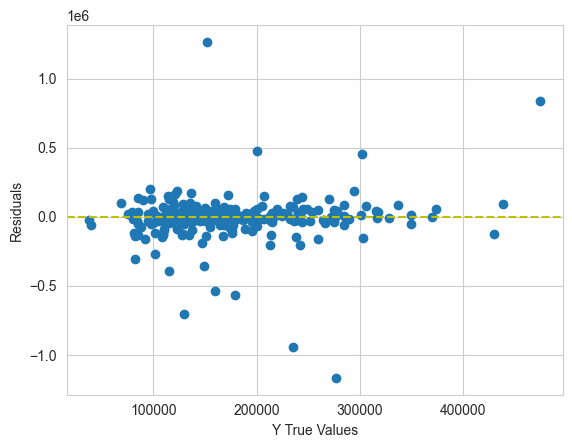

In [8]:
residual_plot(X_test, y_test, poly_reg)

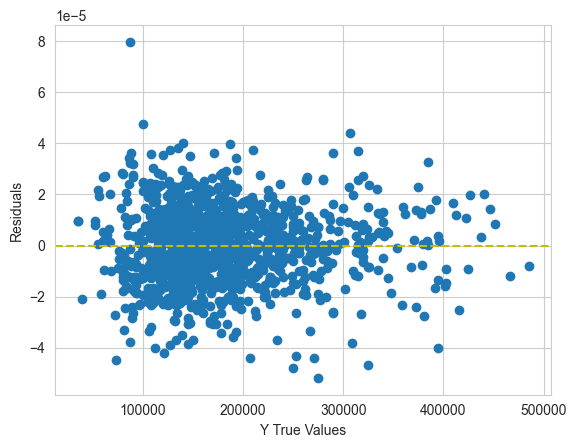

In [9]:
residual_plot(X_train, y_train, poly_reg)

##### Deploy Model

In [12]:
from joblib import dump, load
model_path = models_trained_dir / '0.2-os-polynomial-regression-01.joblib'
dump(poly_reg, model_path )
converter_path = models_trained_dir / '0.2-os-polynomial-regression-01-converter.joblib'
dump(polynomial_converter, converter_path)

['..\\models\\trained\\0.2-os-polynomial-regression-01-converter.joblib']

### Model on Scaled Data and Regularization

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
from sklearn.linear_model import Ridge

In [27]:
ridge_model = Ridge(alpha=10)

In [28]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=10)

In [30]:
evaluate_regression(ridge_model,X_train, X_test, y_train, y_test)

Evaluations for Sale Prices
    	R2 Train: 0.9999654761644271
    	R2 Test: -3278.9277786687903
    	Mean:179370.5941023417
    	Mean Absolute Error: 3648061.506150782
    	Mean Squared Error: 15359596053985.734
    	Root Mean Squared Error: 3919132.053654959


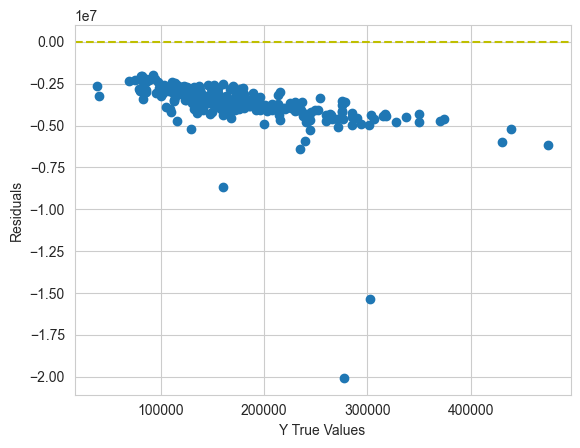

In [31]:
residual_plot(X_test, y_test, ridge_model)

In [32]:
from sklearn.linear_model import RidgeCV

In [33]:
ridge_cv_model = RidgeCV(cv=int(y_train.size*0.1), alphas=np.logspace(-3, 1, 10))

In [34]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e-03, 2.78255940e-03, 7.74263683e-03, 2.15443469e-02,
       5.99484250e-02, 1.66810054e-01, 4.64158883e-01, 1.29154967e+00,
       3.59381366e+00, 1.00000000e+01]),
        cv=115)

In [43]:
print(ridge_cv_model.alpha_)
ridge_cv_model.best_score_

0.021544346900318832


0.591313279047981

In [39]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_s

Evaluations for Sale Prices
    	R2 Train: 0.9999999817787663
    	R2 Test: -3358.762812167327
    	Mean:179370.5941023417
    	Mean Absolute Error: 3822091.734204518
    	Mean Squared Error: 15733456074157.162
    	Root Mean Squared Error: 3966542.0802201456


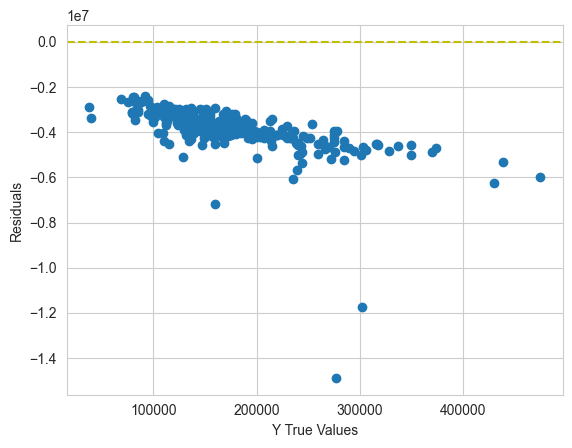

In [44]:
evaluate_regression(ridge_cv_model,X_train, X_test, y_train, y_test)
residual_plot(X_test, y_test, ridge_cv_model)

In [ ]:
from sklearn.linear_model import LassoCV

lasso_cv_model = LassoCV(cv=int(y_train.size * 0.1),
                         alphas=np.logspace(-3, 1, 10), max_iter=1e+8)
lasso_cv_model.fit(X_train, y_train)

In [ ]:
evaluate_regression(lasso_cv_model,X_train, X_test, y_train, y_test)
residual_plot(X_test, y_test, lasso_cv_model)

##### Elastic net

In [ ]:
from sklearn.linear_model import ElasticNetCV

In [ ]:
elastic_cv_model = ElasticNetCV()